In [3]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=015bdc0d028070b1137dbe91bf3713a3


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


603

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | poronaysk
Processing Record 4 of Set 1 | ixtapa
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | kruisfontein
Processing Record 7 of Set 1 | bereda
Processing Record 8 of Set 1 | uyuni
Processing Record 9 of Set 1 | san cristobal
Processing Record 10 of Set 1 | sonoita
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | labutta
City not found. Skipping...
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | bhuj
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 | jiaozuo


Processing Record 36 of Set 4 | wanaka
Processing Record 37 of Set 4 | buchanan
Processing Record 38 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 39 of Set 4 | changji
Processing Record 40 of Set 4 | demba
Processing Record 41 of Set 4 | touros
Processing Record 42 of Set 4 | grand-santi
Processing Record 43 of Set 4 | aflu
City not found. Skipping...
Processing Record 44 of Set 4 | cairns
Processing Record 45 of Set 4 | zaysan
Processing Record 46 of Set 4 | tambopata
Processing Record 47 of Set 4 | napanee
Processing Record 48 of Set 4 | atar
Processing Record 49 of Set 4 | kozhva
Processing Record 50 of Set 4 | severo-kurilsk
Processing Record 1 of Set 5 | pandhana
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | midland
Processing Record 4 of Set 5 | bethel
Processing Record 5 of Set 5 | riyadh
Processing Record 6 of Set 5 | shahrud
Processing Record 7 of Set 5 | shache
Processing Record 8 of Set 5 | ribeira grande
Processing Record 9 of Set

Processing Record 23 of Set 8 | benguela
Processing Record 24 of Set 8 | corning
Processing Record 25 of Set 8 | calama
Processing Record 26 of Set 8 | wiang sa
Processing Record 27 of Set 8 | ciras
City not found. Skipping...
Processing Record 28 of Set 8 | bilibino
Processing Record 29 of Set 8 | ordu
Processing Record 30 of Set 8 | tianpeng
Processing Record 31 of Set 8 | beyneu
Processing Record 32 of Set 8 | indianola
Processing Record 33 of Set 8 | ostrovnoy
Processing Record 34 of Set 8 | wesselsbron
Processing Record 35 of Set 8 | norwich
Processing Record 36 of Set 8 | ahipara
Processing Record 37 of Set 8 | krasavino
Processing Record 38 of Set 8 | sterling
Processing Record 39 of Set 8 | tibati
Processing Record 40 of Set 8 | thaton
Processing Record 41 of Set 8 | salinopolis
Processing Record 42 of Set 8 | baruun-urt
Processing Record 43 of Set 8 | poum
Processing Record 44 of Set 8 | khanpur
Processing Record 45 of Set 8 | bairiki
Processing Record 46 of Set 8 | lakes entr

Processing Record 11 of Set 12 | sakhon nakhon
Processing Record 12 of Set 12 | sao gabriel da cachoeira
Processing Record 13 of Set 12 | kendari
Processing Record 14 of Set 12 | sao felix do xingu
Processing Record 15 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 16 of Set 12 | rabo de peixe
Processing Record 17 of Set 12 | plattsburgh
Processing Record 18 of Set 12 | humberto de campos
Processing Record 19 of Set 12 | batagay
Processing Record 20 of Set 12 | hirara
Processing Record 21 of Set 12 | agsu
City not found. Skipping...
Processing Record 22 of Set 12 | mount gambier
Processing Record 23 of Set 12 | salalah
Processing Record 24 of Set 12 | burnie
Processing Record 25 of Set 12 | nuuk
Processing Record 26 of Set 12 | sabha
Processing Record 27 of Set 12 | krechevitsy
Processing Record 28 of Set 12 | bonthe
Processing Record 29 of Set 12 | huarmey
Processing Record 30 of Set 12 | erenhot
Processing Record 31 of Set 12 | saint-georges
Processing R

In [11]:
len(city_data)

547

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,23.00,50,90,21.85,GL,2021-01-28 04:06:10
1,Poronaysk,49.2167,143.1167,10.09,86,94,7.70,RU,2021-01-28 04:10:45
2,Ixtapa,20.7000,-105.2000,68.00,88,1,1.21,MX,2021-01-28 04:10:45
3,Souillac,-20.5167,57.5167,75.20,88,20,2.30,MU,2021-01-28 04:05:57
4,Kruisfontein,-34.0033,24.7314,55.99,94,57,1.01,ZA,2021-01-28 04:07:37
5,Bereda,43.2686,-7.5406,55.99,91,100,10.00,ES,2021-01-28 04:10:46
6,Uyuni,-20.4597,-66.8250,47.93,48,1,10.27,BO,2021-01-28 04:10:46
7,San Cristobal,7.7669,-72.2250,64.00,81,60,1.70,VE,2021-01-28 04:10:46
8,Sonoita,31.8500,-112.8333,50.00,55,100,2.39,MX,2021-01-28 04:10:46
9,Hermanus,-34.4187,19.2345,52.00,93,3,6.11,ZA,2021-01-28 04:10:46


In [13]:
new_column_number = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_number]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2021-01-28 04:06:10,65.6145,-37.6368,23.00,50,90,21.85
1,Poronaysk,RU,2021-01-28 04:10:45,49.2167,143.1167,10.09,86,94,7.70
2,Ixtapa,MX,2021-01-28 04:10:45,20.7000,-105.2000,68.00,88,1,1.21
3,Souillac,MU,2021-01-28 04:05:57,-20.5167,57.5167,75.20,88,20,2.30
4,Kruisfontein,ZA,2021-01-28 04:07:37,-34.0033,24.7314,55.99,94,57,1.01
...,...,...,...,...,...,...,...,...,...
542,Opuwo,NA,2021-01-28 04:11:58,-18.0607,13.8400,67.30,73,67,2.30
543,Porto Torres,IT,2021-01-28 04:11:58,40.8350,8.3972,57.20,82,20,10.36
544,Klaksvik,FO,2021-01-28 04:11:58,62.2266,-6.5890,24.80,68,94,1.14
545,Port Hedland,AU,2021-01-28 04:11:58,-20.3167,118.5667,95.00,55,0,12.66


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

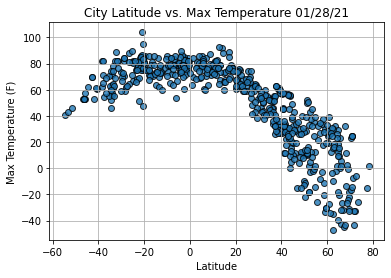

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

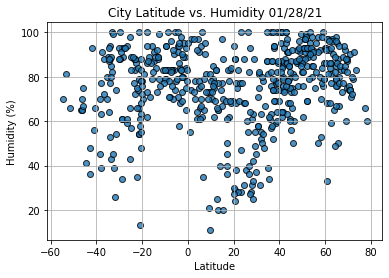

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

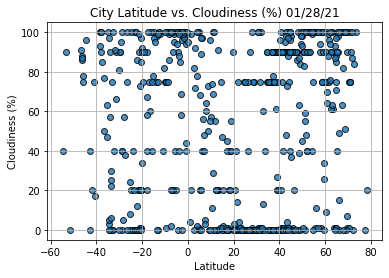

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

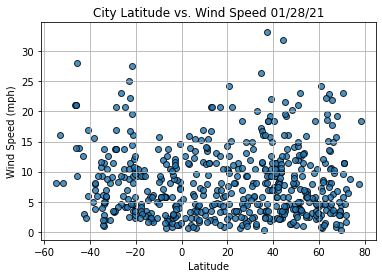

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [46]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-01-28 04:10:01
Lat                         -54.8
Lng                         -68.3
Max Temp                       41
Humidity                       70
Cloudiness                     40
Wind Speed                   8.05
Name: 13, dtype: object

In [47]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
542    False
543     True
544     True
545    False
546    False
Name: Lat, Length: 547, dtype: bool

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2021-01-28 04:06:10,65.6145,-37.6368,23.00,50,90,21.85
1,Poronaysk,RU,2021-01-28 04:10:45,49.2167,143.1167,10.09,86,94,7.70
2,Ixtapa,MX,2021-01-28 04:10:45,20.7000,-105.2000,68.00,88,1,1.21
5,Bereda,ES,2021-01-28 04:10:46,43.2686,-7.5406,55.99,91,100,10.00
7,San Cristobal,VE,2021-01-28 04:10:46,7.7669,-72.2250,64.00,81,60,1.70


In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

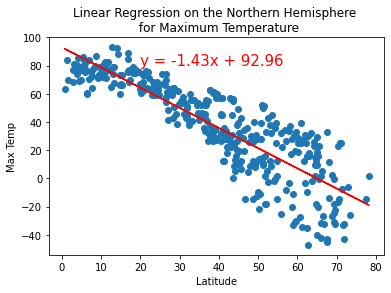

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', "Max Temp",(20,80))

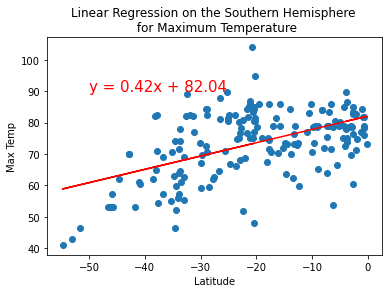

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

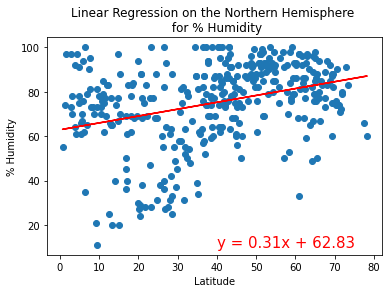

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

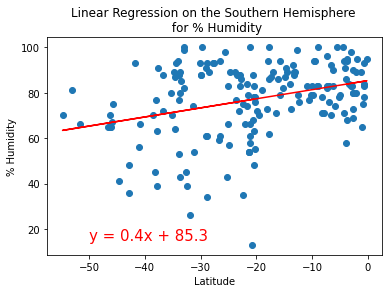

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

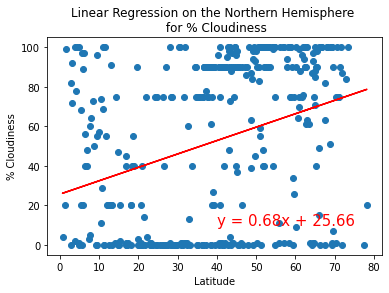

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

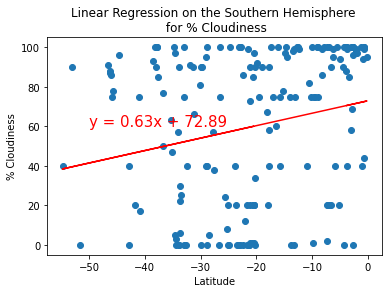

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

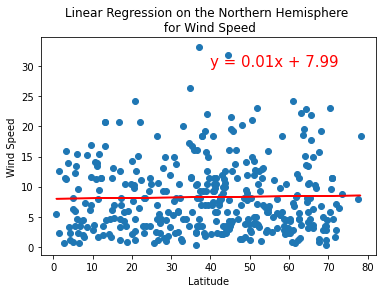

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

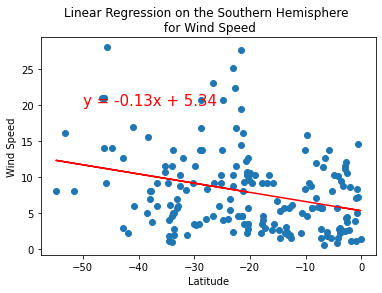

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))